**Goal: Predicting Customer Churn for Vodafone

Hypothesis
1.Increases in monthly charges causes customers to churn
2.Customers with multiple lines are less likely to churn
3.Tech support for customers reduces churn rate for categories such as females and senior citizens

Questions
 1. what is the chrun rate by:
i. Payment method
ii. Gender
iii. Patner Status
iv. Number of Dependents
 2. Does increase in monthly charges influence:
 a. churn rate by citizenship?
 b. churn rate paperless vs. non- paperless?
 3. Which internet  service customers churn the most?
 4. Does tech support influence customer churn in any way and by how much?


Importing Relevant Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Loading and Exploring the dataset

In [63]:
data =pd.read_csv("C:/Users/HP/Documents/Telco-Customer-Churn.csv")
data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [65]:
# previewing unique columns
unique_patner_status =(data.loc[:,'Partner']).value_counts()
unique_patner_status

No     3641
Yes    3402
Name: Partner, dtype: int64

In [66]:
unique_dependent_numbers =(data.loc[:,'Dependents']).value_counts()
unique_dependent_numbers

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [67]:
unique_SeniorCitizen_numbers =(data.loc[:,'SeniorCitizen']).value_counts()
unique_SeniorCitizen_numbers

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Data Cleaning and Preprocessing

In [68]:
#convert totalcharges column to datatype; float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
print (data.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [69]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [70]:
# dropping duplicates
data.drop_duplicates(inplace =True)
data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7043 rows x 21 columns]

In [71]:
# dealing with missing cells
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [72]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(data[['TotalCharges']])
data['TotalCharges'] = imputer.transform(data[['TotalCharges']])

In [73]:
#checking for changes
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [74]:
#Encoding data for some columns  by replacing categorical values by 0 & 1
#converting into binary integers
data = data.copy()
columns1 = ['Partner','Dependents','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn','PhoneService']
for i in columns1:
    data[i]=data[i].replace(['Yes', 'No'], [0,1])
       

            

In [75]:
data['gender']=data['gender'].replace({'Male':0, 'Female':1})

In [76]:
data

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       1              0        0           1       1   
1     5575-GNVDE       0              0        1           1      34   
2     3668-QPYBK       0              0        1           1       2   
3     7795-CFOCW       0              0        1           1      45   
4     9237-HQITU       1              0        1           1       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB       0              0        0           0      24   
7039  2234-XADUH       1              0        0           0      72   
7040  4801-JZAZL       1              0        0           0      11   
7041  8361-LTMKD       0              1        0           1       4   
7042  3186-AJIEK       0              0        1           1      66   

      PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0                1  No phone service             DSL              1  ...   
1                0                No             DSL              0  ...   
2                0                No             DSL              0  ...   
3                1  No phone service             DSL              0  ...   
4                0                No     Fiber optic              1  ...   
...            ...               ...             ...            ...  ...   
7038             0               Yes             DSL              0  ...   
7039             0               Yes     Fiber optic              1  ...   
7040             1  No phone service             DSL              0  ...   
7041             0               Yes     Fiber optic              1  ...   
7042             0                No     Fiber optic              0  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                   1           1           1               1  Month-to-month   
1                   0           1           1               1        One year   
2                   1           1           1               1  Month-to-month   
3                   0           0           1               1        One year   
4                   1           1           1               1  Month-to-month   
...               ...         ...         ...             ...             ...   
7038                0           0           0               0        One year   
7039                0           1           0               0        One year   
7040                1           1           1               1  Month-to-month   
7041                1           1           1               1  Month-to-month   
7042                0           0           0               0        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                   0           Electronic check          29.85         29.85   
1                   1               Mailed check          56.95       1889.50   
2                   0               Mailed check          53.85        108.15   
3                   1  Bank transfer (automatic)          42.30       1840.75   
4                   0           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038                0               Mailed check          84.80       1990.50   
7039                0    Credit card (automatic)         103.20       7362.90   
7040                0           Electronic check          29.60        346.45   
7041                0               Mailed check          74.40        306.60   
7042                0  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0         1  
1         1  
2         0  
3         1  
4         0  
...     ...  
7038      1  
7039      1  
7040      1  
7041      0  
7042      1  

[7043 rows x 21 columns]

In [77]:
# drop customer ID column
data.drop(columns = ["customerID"], inplace = True)
data

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        0           1       1             1   
1          0              0        1           1      34             0   
2          0              0        1           1       2             0   
3          0              0        1           1      45             1   
4          1              0        1           1       2             0   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        0           0      24             0   
7039       1              0        0           0      72             0   
7040       1              0        0           0      11             1   
7041       0              1        0           1       4             0   
7042       0              0        1           1      66             0   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL              1          Yes   
1                   No             DSL              0           No   
2                   No             DSL              0          Yes   
3     No phone service             DSL              0           No   
4                   No     Fiber optic              1           No   
...                ...             ...            ...          ...   
7038               Yes             DSL              0           No   
7039               Yes     Fiber optic              1          Yes   
7040  No phone service             DSL              0           No   
7041               Yes     Fiber optic              1           No   
7042                No     Fiber optic              0           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                   1           1           1               1  Month-to-month   
1                   0           1           1               1        One year   
2                   1           1           1               1  Month-to-month   
3                   0           0           1               1        One year   
4                   1           1           1               1  Month-to-month   
...               ...         ...         ...             ...             ...   
7038                0           0           0               0        One year   
7039                0           1           0               0        One year   
7040                1           1           1               1  Month-to-month   
7041                1           1           1               1  Month-to-month   
7042                0           0           0               0        Two year   

      PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                    0           Electronic check           29.85   
1                    1               Mailed check           56.95   
2                    0               Mailed check           53.85   
3                    1  Bank transfer (automatic)           42.30   
4                    0           Electronic check           70.70   
...                ...                        ...             ...   
7038                 0               Mailed check           84.80   
7039                 0    Credit card (automatic)          103.20   
7040                 0           Electronic check           29.60   
7041                 0               Mailed check           74.40   
7042                 0  Bank transfer (automatic)          105.65   

      TotalCharges  Churn  
0            29.85      1  
1          1889.50      1  
2           108.15      0  
3          1840.75      1  
4           151.65      0  
...            ...    ...  
7038       1990.50      1  
7039       7362.90      1  
7040        346.45      1  
7041        306.60      0  
7042       6844.50      1  

[7043 rows x 20 columns]

Answering my Questions

**Q1: Churn rate by Payment method, Gender, Partner Status, and number of dependents

In [78]:
churn_rate =pd.DataFrame(data.groupby('PaymentMethod')['Churn'].sum().reset_index())
churn_rate


PaymentMethod  Churn
0  Bank transfer (automatic)   1286
1    Credit card (automatic)   1290
2           Electronic check   1294
3               Mailed check   1304

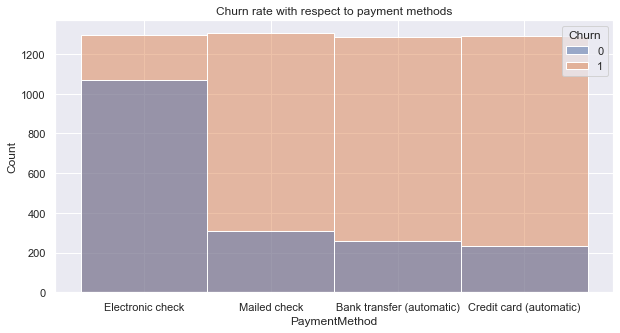

<Figure size 720x360 with 0 Axes>

In [79]:
sns.histplot(data= data, x="PaymentMethod", hue="Churn")
plt.title("Churn rate with respect to payment methods")
plt.figure(figsize=(10,5))
plt.show()

Observations: Customers who use electronic checks as payment method churned more than customers using other payment methods. Customers using automatic credit cards churned least

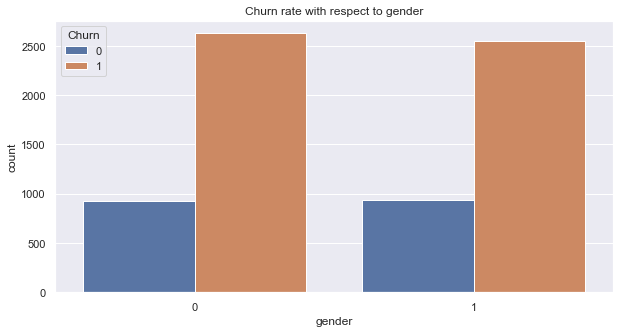

<Figure size 864x576 with 0 Axes>

In [80]:
#churn rate by gender
sns.countplot(data= data, x="gender", hue="Churn")
plt.title("Churn rate with respect to gender")
plt.figure(figsize=(12,8))
plt.show()

Observations: Females churn more than males

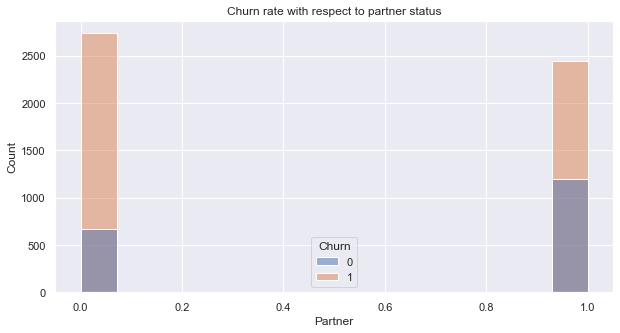

<Figure size 864x576 with 0 Axes>

In [81]:
#churn rate by partner and dependents status
sns.histplot(data= data, x="Partner", hue="Churn")
plt.title("Churn rate with respect to partner status")
plt.figure(figsize=(12,8))
plt.show()

Observation: customers with partners churn at alesser rate than customers without partners

Checking Distribution for Monthly and Total charges

<AxesSubplot:xlabel='MonthlyCharges'>

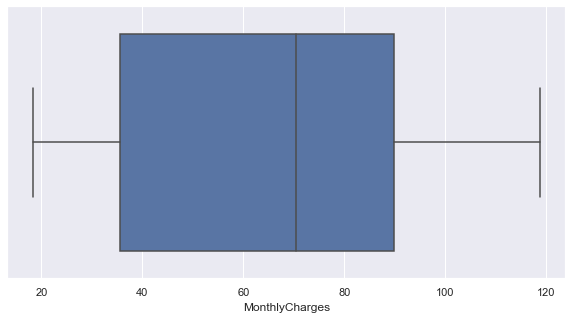

In [82]:
#visualizing distribution for monthly charges
sns.set(rc ={'figure.figsize':(10,5)})
sns.boxplot(data['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges'>

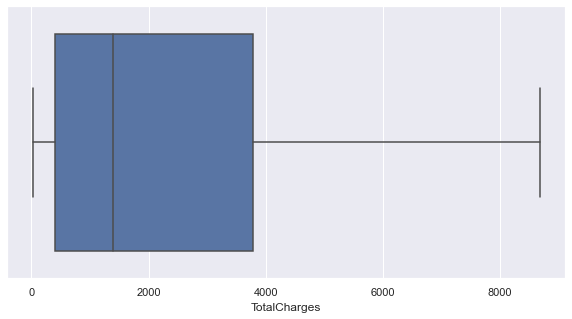

In [83]:
#visualizing total charges distribution
sns.set(rc ={'figure.figsize':(10,5)})
sns.boxplot(data['TotalCharges'])

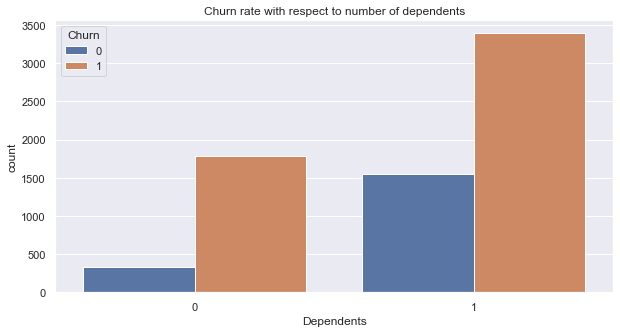

<Figure size 720x360 with 0 Axes>

In [84]:
#churn rate by number of dependents
sns.countplot(data= data, x="Dependents", hue="Churn")
plt.title("Churn rate with respect to number of dependents")
plt.figure(figsize=(10,5))
plt.show()

Observation: Customers without dependents churn more than customers with dependents

**Question: which Internet service customers churn the most?

In [85]:
#internet service users
Internet = data['InternetService']. value_counts()
Internet_customers =pd.DataFrame(Internet)
Internet_customers =Internet_customers.reset_index()
Internet_customers.columns =['InternetService','Total']
Internet_customers

InternetService  Total
0     Fiber optic   3096
1             DSL   2421
2              No   1526

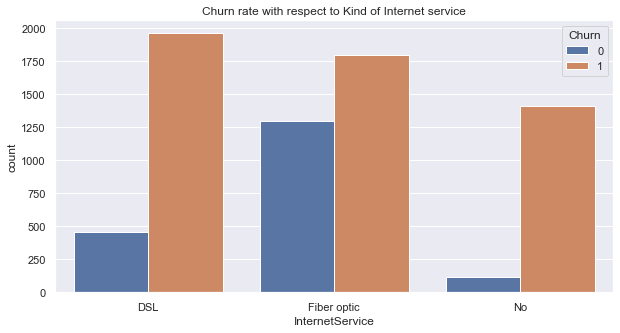

<Figure size 720x360 with 0 Axes>

In [86]:
#visualizing which internet service customers churn the most
sns.countplot(data= data, x="InternetService", hue="Churn")
plt.title("Churn rate with respect to Kind of Internet service")
plt.figure(figsize=(10,5))
plt.show()

Observations: the table above indicates that most of the customers using internet service fall under the fiber optics category with a total of 3096 customers representing ....% of the whole. However from the plot they also are the category that churns most. To dig further, we try to find out if tech support has any influence on the churn rate trends depicted for fiber optic internet service users

Text(0.5, 1.0, 'Churn rate with respect to Tech Support for Kind of Internet service')

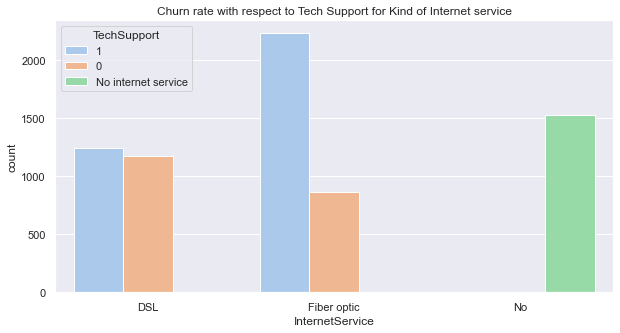

In [87]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(data= data, x="InternetService", hue="TechSupport", palette ="pastel")
plt.title("Churn rate with respect to Tech Support for Kind of Internet service")

Observation: Customers using Fibre optic internet service did not receive tech support as much as customers using DSL internet service. A possible reason for the high churn rate amongst Fibre optic internet users as depicted earlier.

**Question: Does monthly charges influence churn rate by citizenship?

Text(0.5, 1.0, 'Churn rate with respect to Charges')

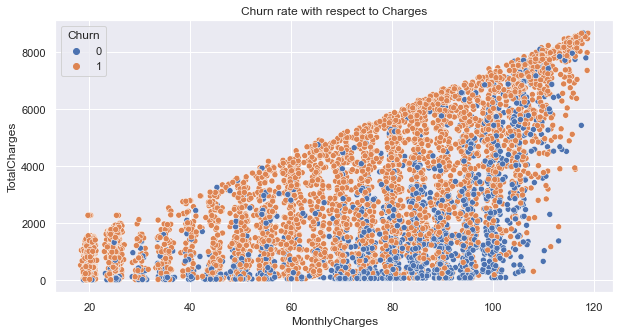

In [88]:
#  general preview 0f relationship between charges(total/monthly) and churn rate
sns.scatterplot(data =data, y='TotalCharges', x='MonthlyCharges', hue='Churn')
plt.title("Churn rate with respect to Charges")

Observation: There's a positive relationship between charges and churn rate. As charges increase(monthly/ Total), churnrate increases in proportion.

Text(0.5, 1.0, 'Churn rate with respect to Citizenship')

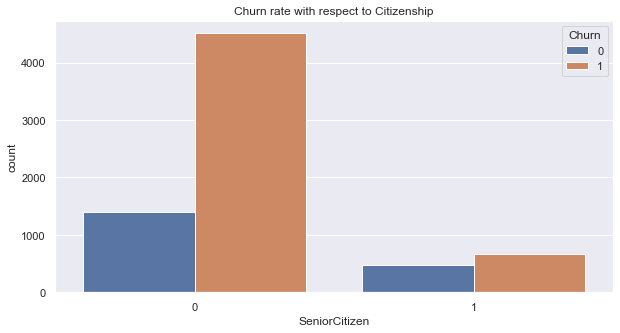

In [89]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(data= data, x="SeniorCitizen", hue="Churn")
plt.title("Churn rate with respect to Citizenship")

Observation: Non SeniorCitizens churned more than their counterpart Senior citizens

Text(0.5, 1.0, 'Churn rate with respect to  Citizenship based on TechSupport')

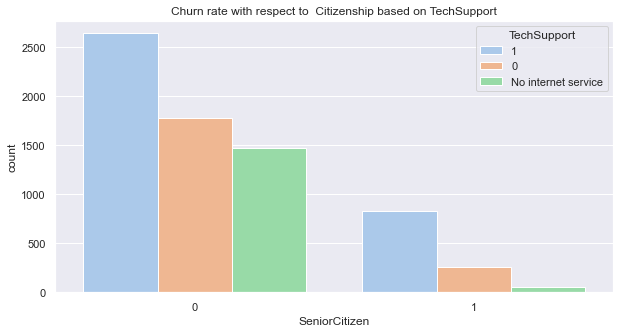

In [90]:
#visualizing if tech support had any influence on churn rate of seniorcitizens
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(data= data, x="SeniorCitizen", hue="TechSupport", palette ="pastel")
plt.title("Churn rate with respect to  Citizenship based on TechSupport")

Observation: Non Senior Citizens received TechSupport more than senior citizens but that did not positively influence their churn rate since they still churned the most 

Text(0.5, 1.0, 'Monthly charges on Citizenship Churn')

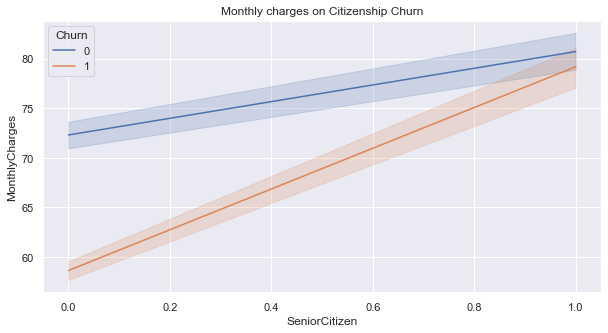

In [91]:
#visualizing effect of  monthly charges on Citizenship churn
sns.lineplot(data=data, x="SeniorCitizen", y="MonthlyCharges", hue ="Churn")
plt.title("Monthly charges on Citizenship Churn")

Observation: Churn rates are higher for senior citizens when monthly charges go up

**Question:Does Monthly Charges influence churn rate of customers with paperless billing or not

Text(0.5, 1.0, 'Churn rate with respect to Charges Vrs PaperlessBilling')

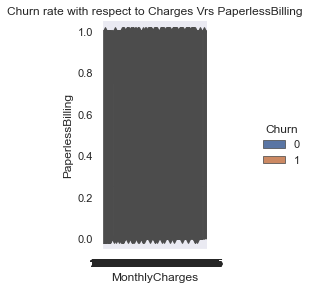

In [92]:
sns.catplot(data =data, y='PaperlessBilling', x='MonthlyCharges', hue='Churn', kind ='box',height=4, aspect=.6,)
plt.title("Churn rate with respect to Charges Vrs PaperlessBilling")

In [93]:
data.nunique()



gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [94]:
#One hot encoding categorical data
data = pd.get_dummies(data= data, columns=['MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod'])
data

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        0           1       1             1   
1          0              0        1           1      34             0   
2          0              0        1           1       2             0   
3          0              0        1           1      45             1   
4          1              0        1           1       2             0   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        0           0      24             0   
7039       1              0        0           0      72             0   
7040       1              0        0           0      11             1   
7041       0              1        0           1       4             0   
7042       0              0        1           1      66             0   

      PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                    0           29.85         29.85      1  ...   
1                    1           56.95       1889.50      1  ...   
2                    0           53.85        108.15      0  ...   
3                    1           42.30       1840.75      1  ...   
4                    0           70.70        151.65      0  ...   
...                ...             ...           ...    ...  ...   
7038                 0           84.80       1990.50      1  ...   
7039                 0          103.20       7362.90      1  ...   
7040                 0           29.60        346.45      1  ...   
7041                 0           74.40        306.60      0  ...   
7042                 0          105.65       6844.50      1  ...   

      StreamingMovies_0  StreamingMovies_1  \
0                     0                  1   
1                     0                  1   
2                     0                  1   
3                     0                  1   
4                     0                  1   
...                 ...                ...   
7038                  1                  0   
7039                  1                  0   
7040                  0                  1   
7041                  0                  1   
7042                  1                  0   

      StreamingMovies_No internet service  Contract_Month-to-month  \
0                                       0                        1   
1                                       0                        0   
2                                       0                        1   
3                                       0                        0   
4                                       0                        1   
...                                   ...                      ...   
7038                                    0                        0   
7039                                    0                        0   
7040                                    0                        1   
7041                                    0                        1   
7042                                    0                        0   

      Contract_One year  Contract_Two year  \
0                     0                  0   
1                     1                  0   
2                     0                  0   
3                     1                  0   
4                     0                  0   
...                 ...                ...   
7038                  1                  0   
7039                  1                  0   
7040                  0                  0   
7041                  0                  0   
7042                  0                  1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7038      

**Feature Engineering and Preprocessing

In [97]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler = MinMaxScaler()

In [99]:
data_transform =['tenure', 'MonthlyCharges', 'TotalCharges']

In [100]:
data[data_transform]=scaler.fit_transform(data[data_transform])
data

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0          1              0        0           1  0.013889             1   
1          0              0        1           1  0.472222             0   
2          0              0        1           1  0.027778             0   
3          0              0        1           1  0.625000             1   
4          1              0        1           1  0.027778             0   
...      ...            ...      ...         ...       ...           ...   
7038       0              0        0           0  0.333333             0   
7039       1              0        0           0  1.000000             0   
7040       1              0        0           0  0.152778             1   
7041       0              1        0           1  0.055556             0   
7042       0              0        1           1  0.916667             0   

      PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                    0        0.115423      0.001275      1  ...   
1                    1        0.385075      0.215867      1  ...   
2                    0        0.354229      0.010310      0  ...   
3                    1        0.239303      0.210241      1  ...   
4                    0        0.521891      0.015330      0  ...   
...                ...             ...           ...    ...  ...   
7038                 0        0.662189      0.227521      1  ...   
7039                 0        0.845274      0.847461      1  ...   
7040                 0        0.112935      0.037809      1  ...   
7041                 0        0.558706      0.033210      0  ...   
7042                 0        0.869652      0.787641      1  ...   

      StreamingMovies_0  StreamingMovies_1  \
0                     0                  1   
1                     0                  1   
2                     0                  1   
3                     0                  1   
4                     0                  1   
...                 ...                ...   
7038                  1                  0   
7039                  1                  0   
7040                  0                  1   
7041                  0                  1   
7042                  1                  0   

      StreamingMovies_No internet service  Contract_Month-to-month  \
0                                       0                        1   
1                                       0                        0   
2                                       0                        1   
3                                       0                        0   
4                                       0                        1   
...                                   ...                      ...   
7038                                    0                        0   
7039                                    0                        0   
7040                                    0                        1   
7041                                    0                        1   
7042                                    0                        0   

      Contract_One year  Contract_Two year  \
0                     0                  0   
1                     1                  0   
2                     0                  0   
3                     1                  0   
4                     0                  0   
...                 ...                ...   
7038                  1                  0   
7039                  1                  0   
7040                  0                  0   
7041                  0                  0   
7042                  0                  1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                

In [102]:
data.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.495244       0.162147     0.516967     0.700412     0.449599   
std       0.500013       0.368612     0.499748     0.458110     0.341104   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.125000   
50%       0.000000       0.000000     1.000000     1.000000     0.402778   
75%       1.000000       0.000000     1.000000     1.000000     0.763889   
max       1.000000       1.000000     1.000000     1.000000     1.000000   

       PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
count   7043.000000       7043.000000     7043.000000   7043.000000   
mean       0.096834          0.407781        0.462803      0.261309   
std        0.295752          0.491457        0.299403      0.261366   
min        0.000000          0.000000        0.000000      0.000000   
25%        0.000000          0.000000        0.171642      0.044245   
50%        0.000000          0.000000        0.518408      0.159445   
75%        0.000000          1.000000        0.712438      0.434780   
max        1.000000          1.000000        1.000000      1.000000   

             Churn  ...  StreamingMovies_0  StreamingMovies_1  \
count  7043.000000  ...        7043.000000        7043.000000   
mean      0.734630  ...           0.387903           0.395428   
std       0.441561  ...           0.487307           0.488977   
min       0.000000  ...           0.000000           0.000000   
25%       0.000000  ...           0.000000           0.000000   
50%       1.000000  ...           0.000000           0.000000   
75%       1.000000  ...           1.000000           1.000000   
max       1.000000  ...           1.000000           1.000000   

       StreamingMovies_No internet service  Contract_Month-to-month  \
count                          7043.000000              7043.000000   
mean                              0.216669                 0.550192   
std                               0.412004                 0.497510   
min                               0.000000                 0.000000   
25%                               0.000000                 0.000000   
50%                               0.000000                 1.000000   
75%                               0.000000                 1.000000   
max                               1.000000                 1.000000   

       Contract_One year  Contract_Two year  \
count        7043.000000        7043.000000   
mean            0.209144           0.240664   
std             0.406726           0.427517   
min             0.000000           0.000000   
25%             0.000000           0.000000   
50%             0.000000           0.000000   
75%             0.000000           0.000000   
max             1.000000           1.000000   

       PaymentMethod_Bank transfer (automatic)  \
count                              7043.000000   
mean                                  0.219225   
std                                   0.413751   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
count                            7043.000000                     7043.000000   
mean                                0.216101                        0.335794   
std                                 0.411613                        0.472301   
min                                 0.000000                        0.000000   
25%                                 0.000000                        0.000000   
50%                                 0.000000                        0.000000   
75%                       

In [103]:
sns.pairplot(data)

Check for Class Imbalance

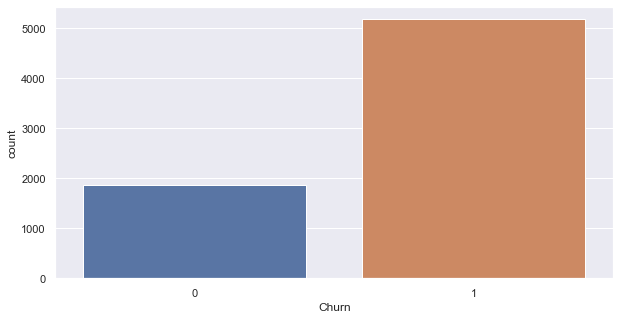

In [107]:
labels =['Churn','No_Churn']
sns.color_palette()
sns.countplot(data.Churn)
sns.set(rc={'figure.figsize':(8,8)})

Split data into Predictor and Response Variable

In [108]:
# Set Training and Testing Data
from sklearn.model_selection import train_test_split

In [111]:
# Separate input features and target
X= data.drop(['Churn'], axis=1, inplace =False)

# Select Target
y = data['Churn']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (5282, 40)
Shape of testing feature: (1761, 40)
Shape of training label: (5282,)
Shape of training label: (1761,)


Perform SMOTE Sampling